In [1]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import time
import os
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from konlpy.tag import Kkma, Hannanum, Komoran, Mecab, Twitter

Twitter = Twitter()
kkma = Kkma()
hannanum = Hannanum()
komoran = Komoran()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


국민동의청원 사이트 : https://petitions.assembly.go.kr/
* 바꾼 이유 : 청와대 국민청원이 문재인 대통령의 임기가 끝나면서 사이트가 닫혀 추가적인 데이터 수집 및 정제가 어려워 비슷한 국회의 국민동의청원으로 변경


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_

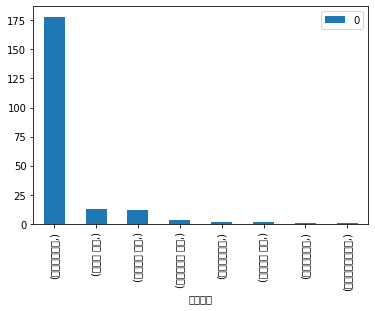

In [3]:
c = pd.read_csv('청원결과.txt',names=['청원결과'], header=None)
d = c.value_counts()
e = pd.DataFrame(d)
e.plot(kind='bar')

In [4]:
e

,0
청원결과,
동의만료폐기,178
위원회 회부,13
소위원회 회부,12
전체위원회 의결,3
본회의불부의,2
소위원회 심사,2
대안반영폐기,1
위원회접수후철회,1


In [5]:
a = pd.read_csv('청원분야.txt',names=['청원분야'], header=None)
a

,청원분야
0,행정/지방자치
1,인권/성평등/노동
2,저출산/고령화/아동/청소년/가족
3,교육
4,문화/체육/관광/언론
...,...
207,저출산/고령화/아동/청소년/가족
208,문화/체육/관광/언론
209,교육
210,보건의료


In [6]:
b = pd.read_csv('청원제목.txt',sep = '\n',names=['청원제목'], header=None)
b

,청원제목
0,지방자치법 개정과 제3차 지방일괄이양법 및 특례시 지원 특별법 제정에 관한 청원
1,"윤석열 당선자가 주장한 지역별, 업종별 최저임금 차등적용의 근거가 되는 최저임금법 ..."
2,생활동반자법의 제정에 관한 청원
3,구성원의 동의 없는 국립 충남대학교와 한밭대학교의 비민주적 통폐합 절차 중단에 관한 청원
4,GMO 표시 의무화에 관한 청원
...,...
207,"소지·시청 등 성범죄 예방을 빌미로 과도한 검열, 감청을 통한 기본권 침해로 이어질..."
208,문화체육관광위원회 소속 국회의원 보좌직원의 공개 채용 선발 제도 도입을 위한 청원
209,대안학교 관련 법령 통과 및 중단된 대안학교 운영 속개 요청에 관한 청원
210,약국개설자가 면허범위 내에서 의약품을 판매하도록 하는 약사법 개정에 관한 청원


In [7]:
! apt-get install fonts-nanum*
!pip install matplotlib
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf  
from matplotlib import font_manager
font_dirs = ['/Library/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading sta

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  if __name__ == '__main__':


In [8]:
with open('청원제목.txt', 'r', encoding='utf-8') as f:
    text = f.read()
okt = Okt()
nouns = okt.nouns(text) 
words = [n for n in nouns if len(n) > 1] 

In [9]:
print(komoran.pos(text))
print(komoran.morphs(text))
print(komoran.nouns(text))

[('지방자치법', 'NNP'), ('개정', 'NNG'), ('과', 'JC'), ('제', 'XPN'), ('3', 'SN'), ('차', 'NNB'), ('지방', 'NNG'), ('일괄', 'NNG'), ('이양', 'NNP'), ('법', 'NNB'), ('및', 'MAJ'), ('특례시', 'NNP'), ('지원', 'NNG'), ('특별법', 'NNG'), ('제정', 'NNG'), ('에', 'JKB'), ('관하', 'VV'), ('ㄴ', 'ETM'), ('청원', 'NNP'), ('윤석열', 'NNP'), ('당선자', 'NNG'), ('가', 'JKS'), ('주장', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('지역', 'NNG'), ('별', 'XSN'), (',', 'SP'), ('업종', 'NNG'), ('별', 'XSN'), ('최저임금', 'NNP'), ('차등', 'NNG'), ('적용', 'NNG'), ('의', 'JKG'), ('근거', 'NNG'), ('가', 'JKS'), ('되', 'VV'), ('는', 'ETM'), ('최저임금법', 'NNP'), ('제', 'XPN'), ('4', 'SN'), ('조', 'NR'), ('조문', 'NNG'), ('삭제', 'NNP'), ('요청', 'NNG'), ('에', 'JKB'), ('관하', 'VV'), ('ㄴ', 'ETM'), ('청원', 'NNP'), ('생활', 'NNG'), ('동반자', 'NNP'), ('법', 'NNG'), ('의', 'JKG'), ('제정', 'NNG'), ('에', 'JKB'), ('관하', 'VV'), ('ㄴ', 'ETM'), ('청원', 'NNP'), ('구성원', 'NNG'), ('의', 'JKG'), ('동의', 'NNG'), ('없', 'VA'), ('는', 'ETM'), ('국립', 'NNP'), ('충남대학교', 'NNP'), ('와', 'JC'), ('한밭대학교', 'NNP'), ('의', 'JKG'), ('

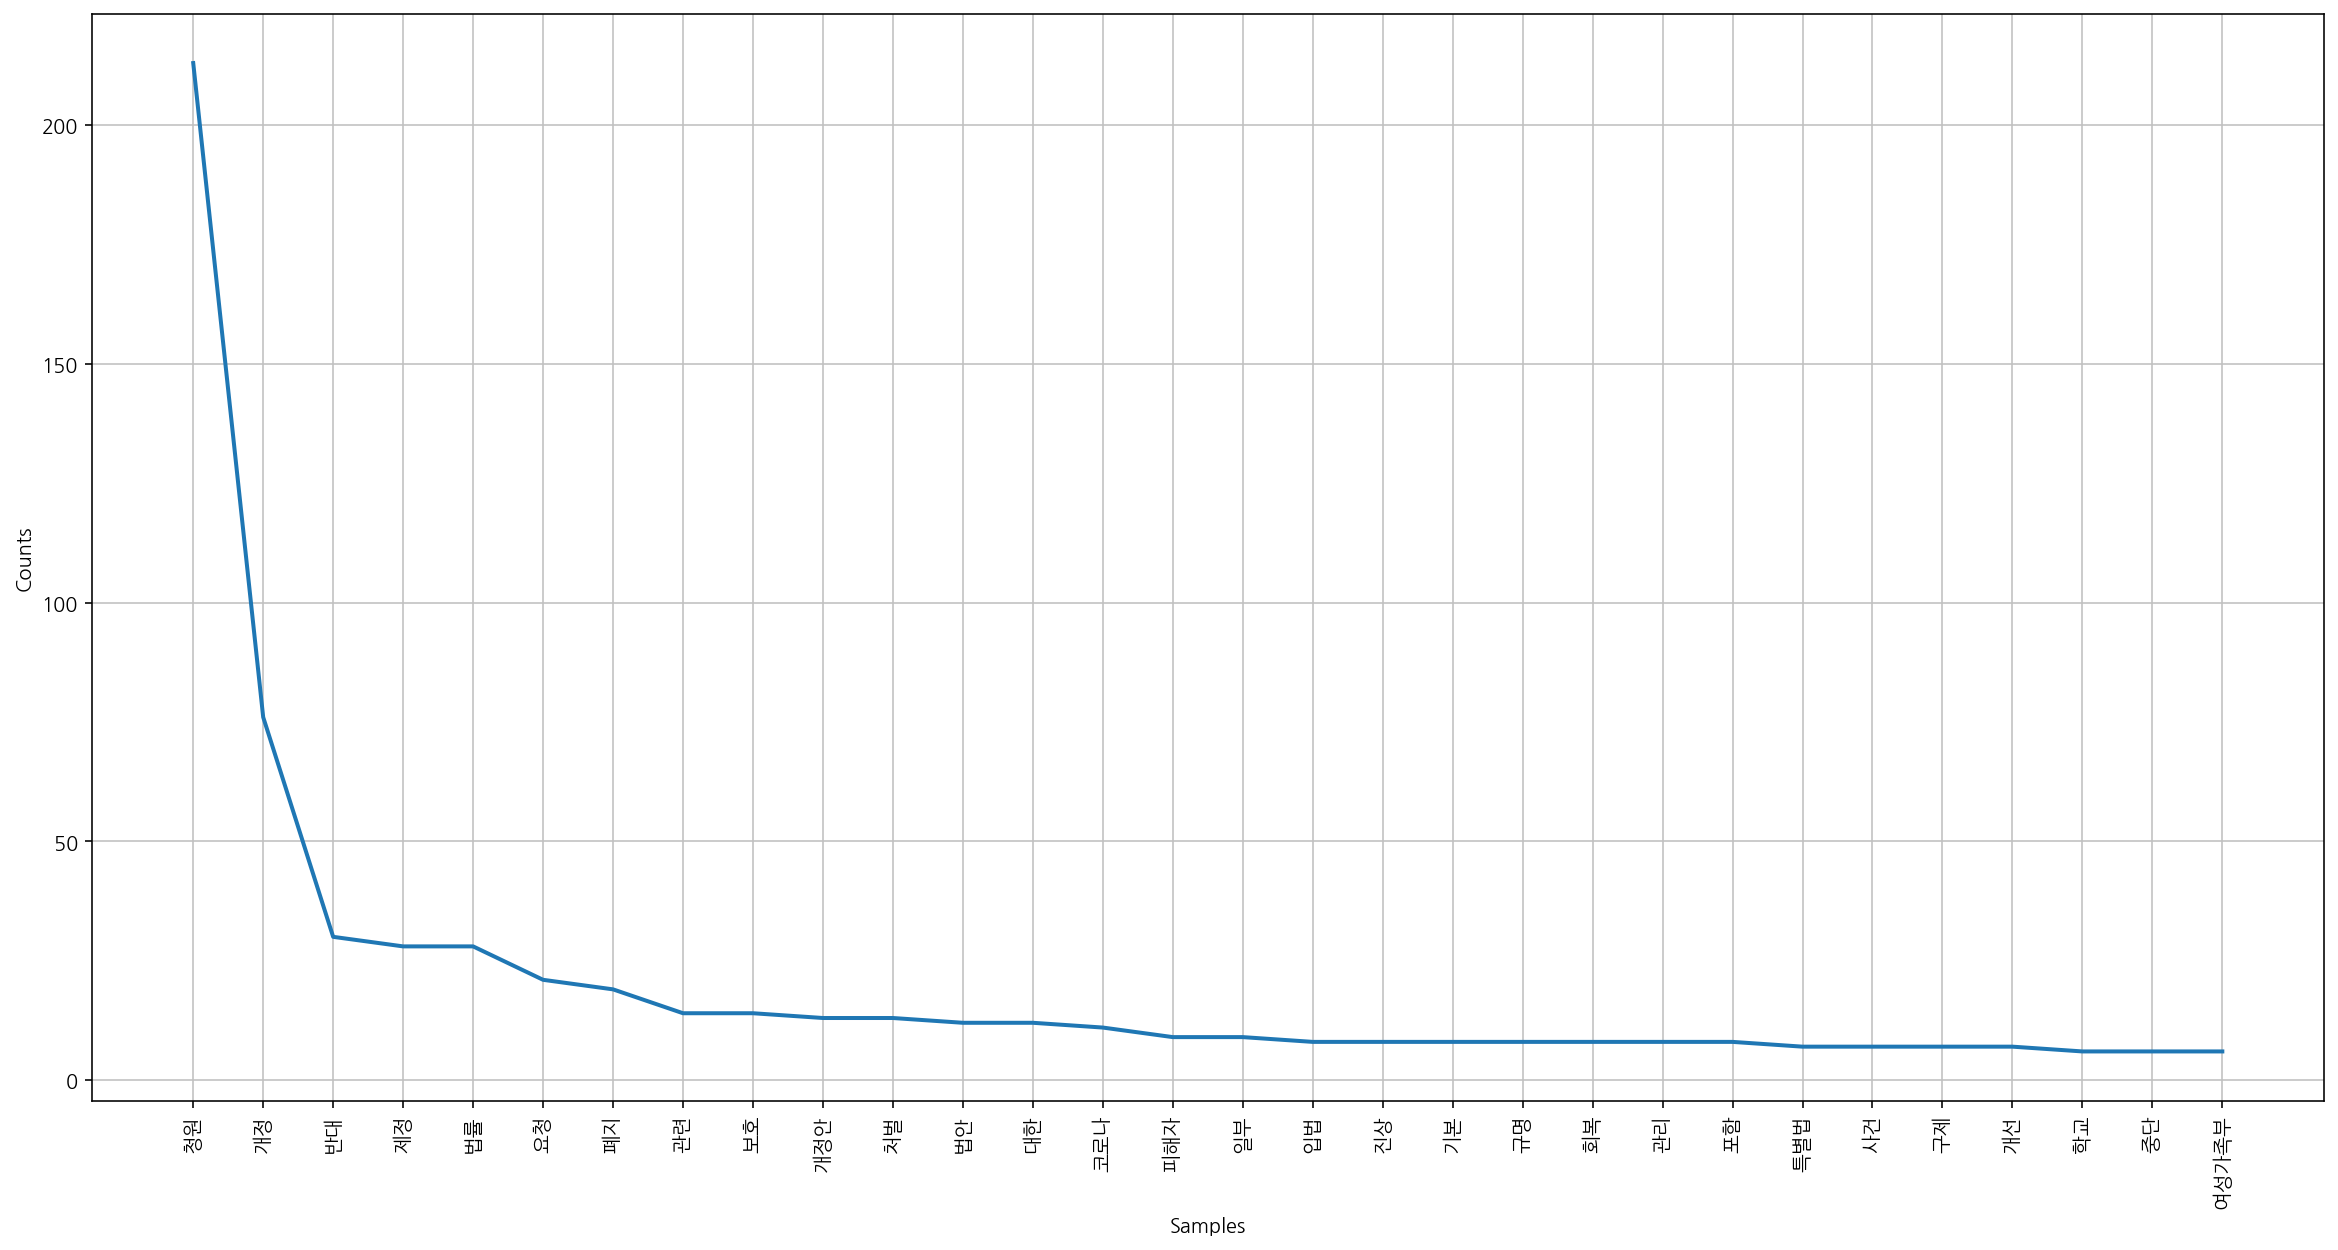

In [10]:
import matplotlib.pyplot as plt
import nltk
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
from matplotlib import font_manager

%config InlineBackend.figure_format = 'retina'
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumGothic') 
#mpl.font_manager._rebuild()

plt.figure(figsize=(20,10))
words = nltk.Text(words, name='단어 빈도수')
words.plot(30)
plt.show()

In [11]:
# 단어 빈도표를 보고 일부 단어 불용어 처리
stopword = ['개정안','제정', '개정', '관련', '대한', '법안', '포함','청원']
text = [i for i in words if i not in stopword]
text_cnt = Counter(text)

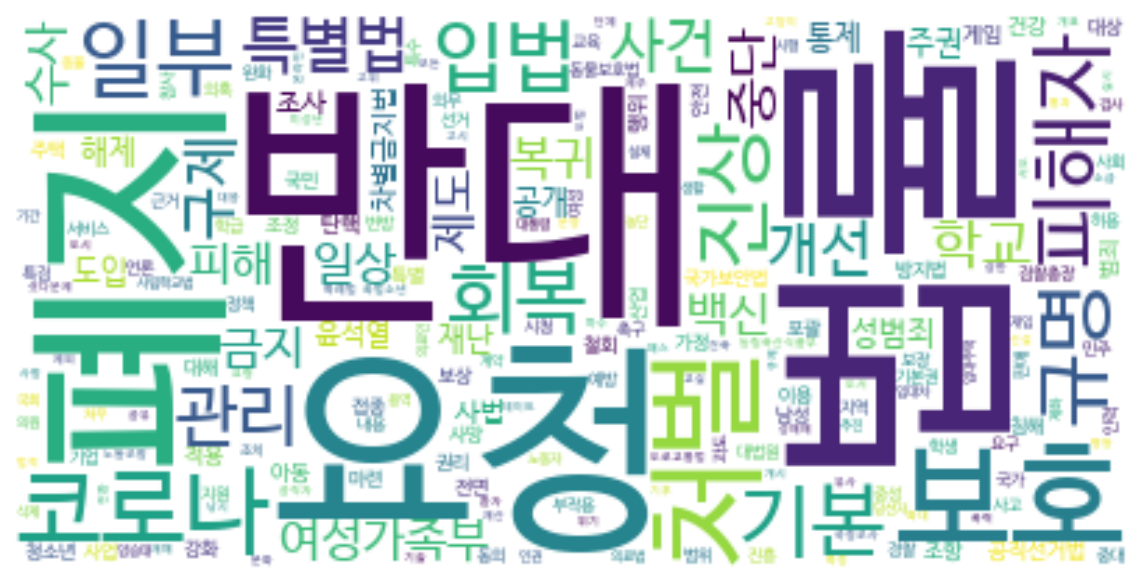

In [12]:
# colormap 글씨색 설정 가능, img_mask, mask 모양 설정
# img_mask = np.array(Image.open("heart.png"))

wordcloud = WordCloud(font_path = fontpath, 
                      background_color='white',
                      # colormap = "Accent_r", 
                      # mask = img_mask, 
                      random_state = 20, 
                      max_words = 200).generate_from_frequencies(text_cnt)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")        
plt.axis("off")

plt.savefig("title.png")
plt.show()

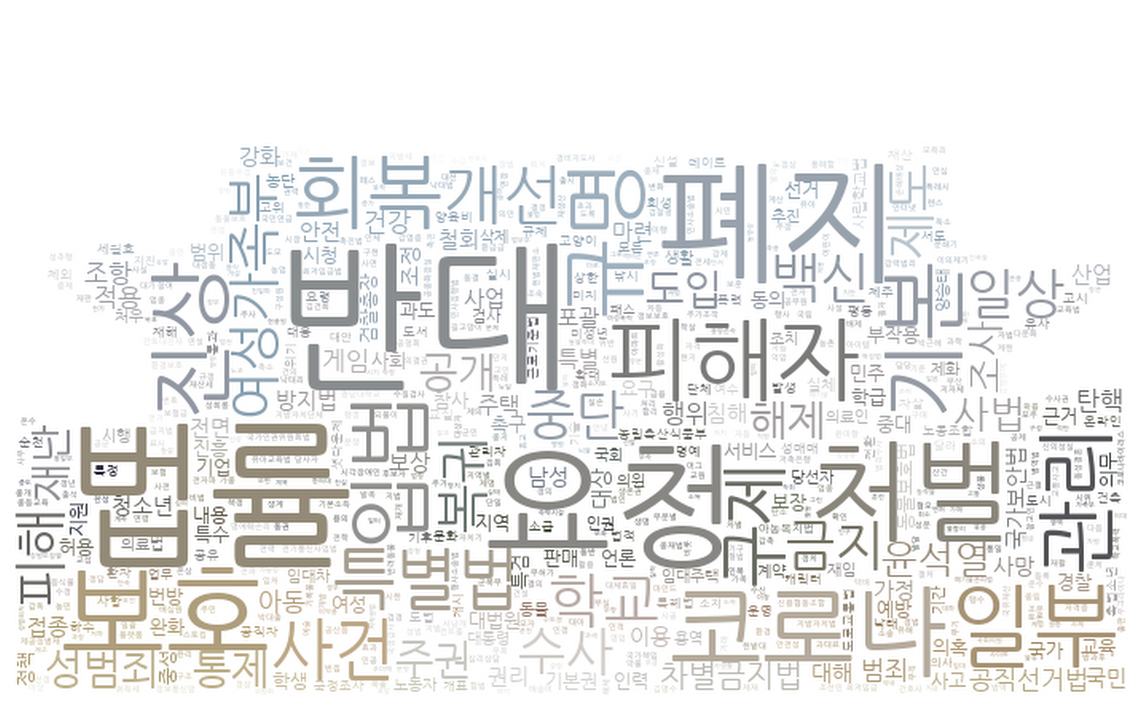

In [13]:
#워드클라우드로 나타내기
import nltk 
from konlpy.tag import Kkma
from konlpy.tag import Twitter

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS 
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

stopwords = set(STOPWORDS)    
img_mask = np.array(Image.open("청와대1.jpg")) 
image_colors = ImageColorGenerator(img_mask)
stopwords = set(STOPWORDS)    
FONTPATH =  "NanumGothic.ttf"

wordcloud = WordCloud(max_font_size = 100, max_words = 1000, background_color='white', stopwords=stopwords, random_state=10,mask=img_mask, color_func=image_colors, font_path = FONTPATH)
wc = wordcloud.generate_from_frequencies(text_cnt)

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = "lanczos")
plt.axis("off")
plt.show()

In [14]:
with open('청원분야.txt', 'r', encoding='utf-8') as f:
    text = f.read()
okt = Okt()
nouns = okt.nouns(text) 
words = [n for n in nouns if len(n) > 1] 

In [15]:
print(komoran.pos(text))
print(komoran.morphs(text))
print(komoran.nouns(text))

[('행정', 'NNG'), ('/', 'SP'), ('지방', 'NNP'), ('자치', 'NNP'), ('인권', 'NNP'), ('/', 'SP'), ('성', 'NNP'), ('평등', 'NNP'), ('/', 'SP'), ('노동', 'NNP'), ('저출산', 'NNP'), ('/', 'SP'), ('고령', 'NNP'), ('화', 'XSN'), ('/', 'SP'), ('아동', 'NNP'), ('/', 'SP'), ('청소년', 'NNP'), ('/', 'SP'), ('가족', 'NNP'), ('교육', 'NNG'), ('문화', 'NNG'), ('/', 'SP'), ('체육', 'NNP'), ('/', 'SP'), ('관광', 'NNP'), ('/', 'SP'), ('언론', 'NNP'), ('행정', 'NNG'), ('/', 'SP'), ('지방', 'NNP'), ('자치', 'NNP'), ('국토', 'NNP'), ('/', 'SP'), ('해양', 'NNG'), ('/', 'SP'), ('교통', 'NNP'), ('수사', 'NNG'), ('/', 'SP'), ('법무', 'NNP'), ('/', 'SP'), ('사법', 'NNP'), ('제도', 'NNP'), ('기타', 'NNG'), ('수사', 'NNG'), ('/', 'SP'), ('법무', 'NNP'), ('/', 'SP'), ('사법', 'NNP'), ('제도', 'NNP'), ('행정', 'NNG'), ('/', 'SP'), ('지방', 'NNP'), ('자치', 'NNP'), ('산업', 'NNG'), ('/', 'SP'), ('통상', 'NNG'), ('보건', 'NNP'), ('의료', 'NNP'), ('보건', 'NNP'), ('의료', 'NNP'), ('외교', 'NNG'), ('/', 'SP'), ('통일', 'NNP'), ('/', 'SP'), ('국방', 'NNP'), ('/', 'SP'), ('안보', 'NNG'), ('수사', 'NNG'), ('/', 'S

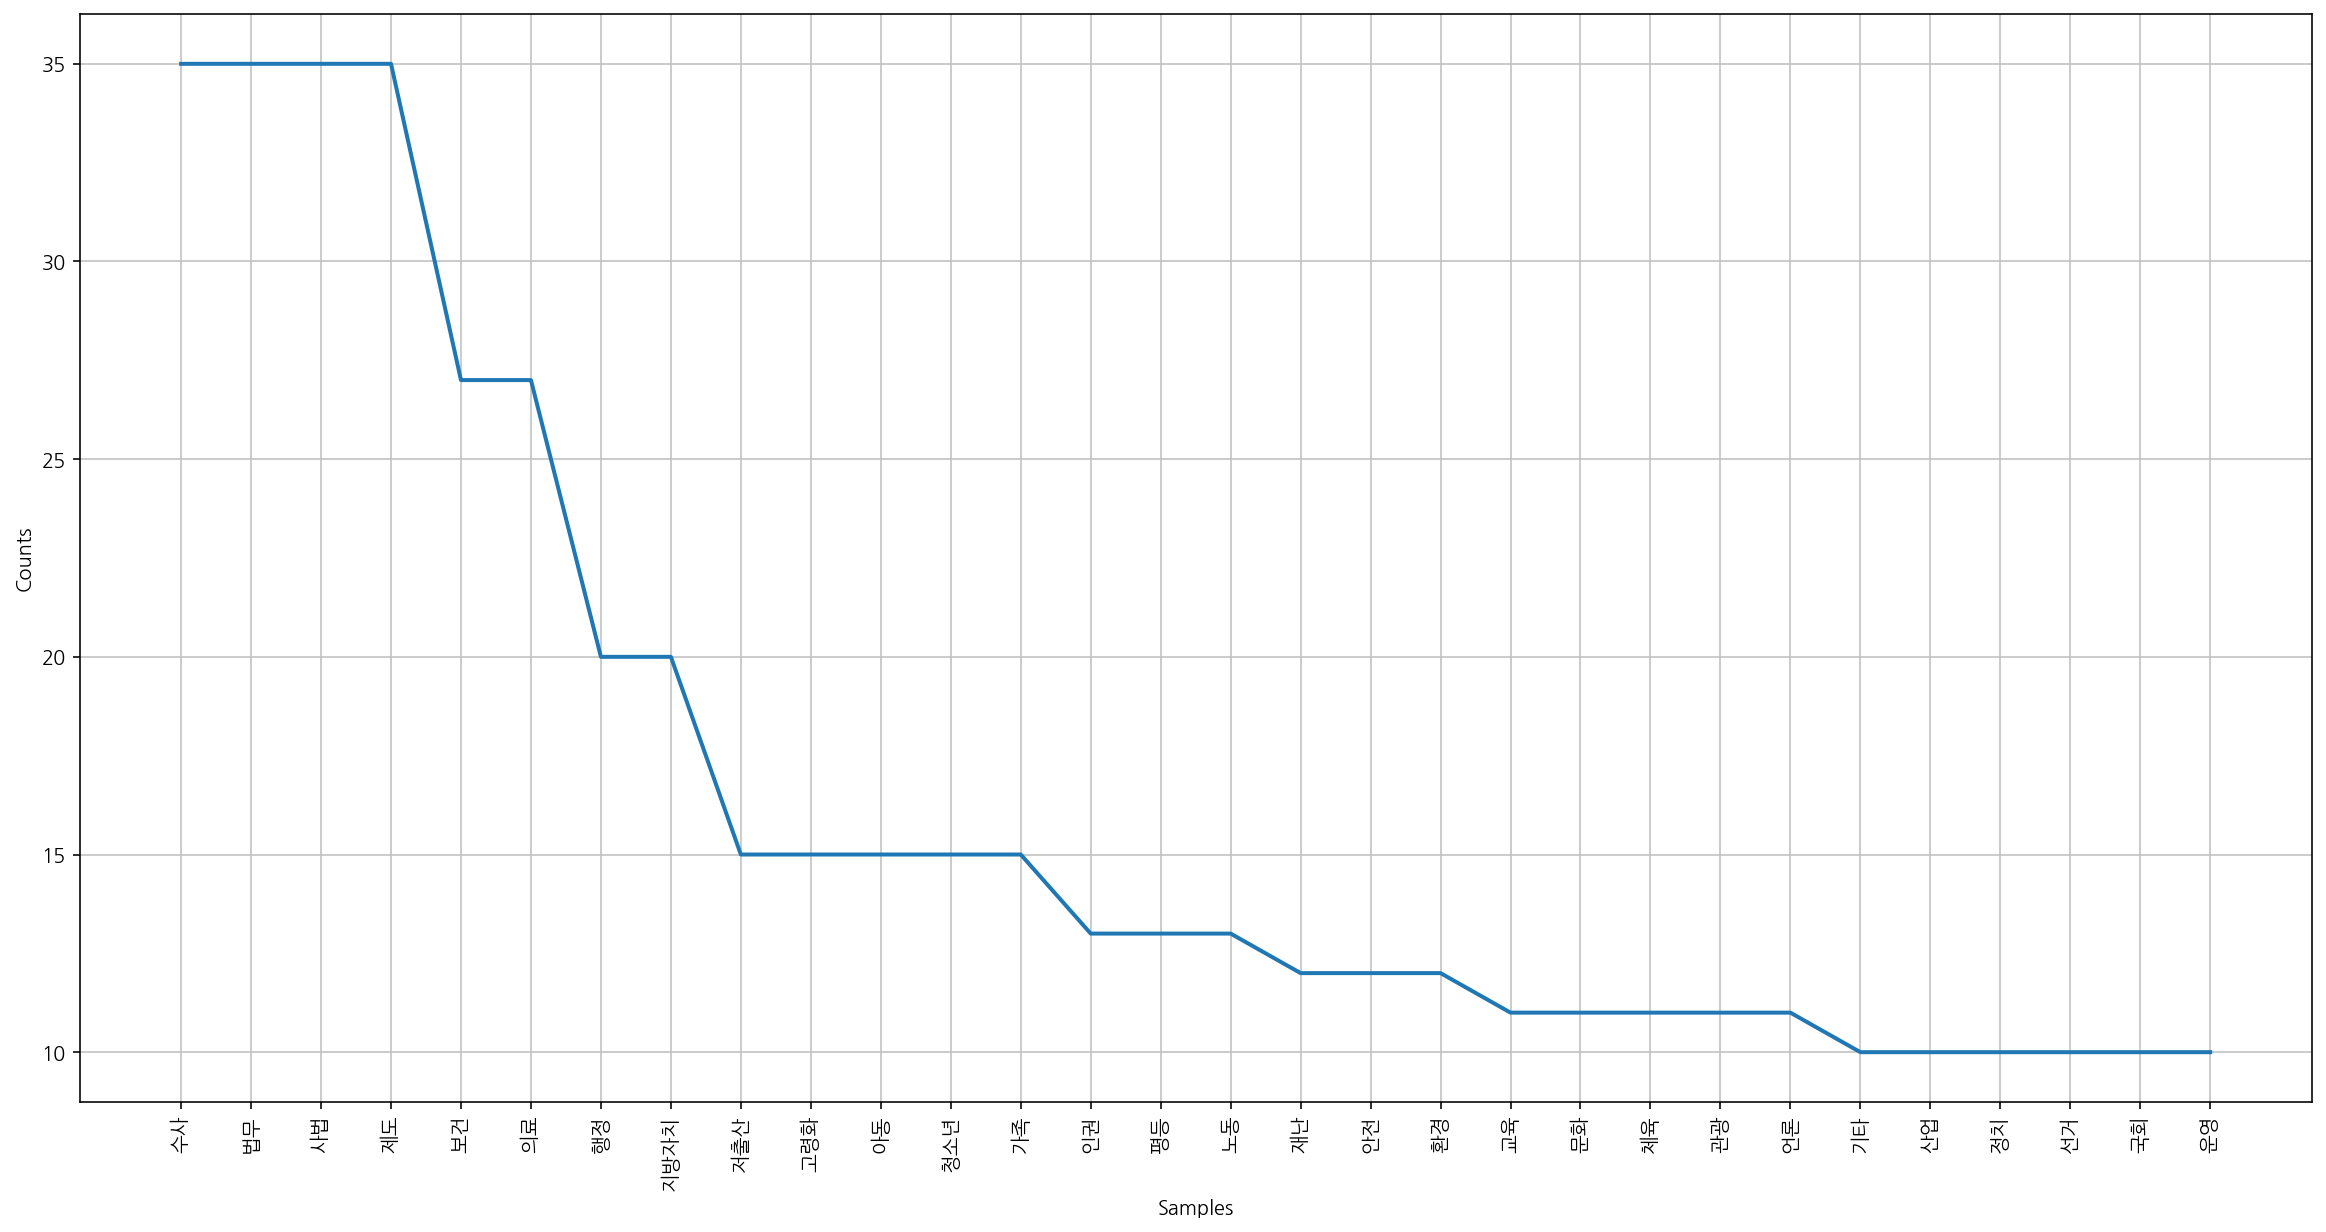

In [16]:
import matplotlib.pyplot as plt
import nltk
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
from matplotlib import font_manager

%config InlineBackend.figure_format = 'retina'
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumGothic') 
#mpl.font_manager._rebuild()

plt.figure(figsize=(20,10))
words = nltk.Text(words, name='단어 빈도수')
words.plot(30) 
plt.show()

In [17]:
# 단어 빈도표를 보고 일부 단어 불용어 처리
stopword = ['.']
text = [i for i in words if i not in stopword]
text_cnt = Counter(text)

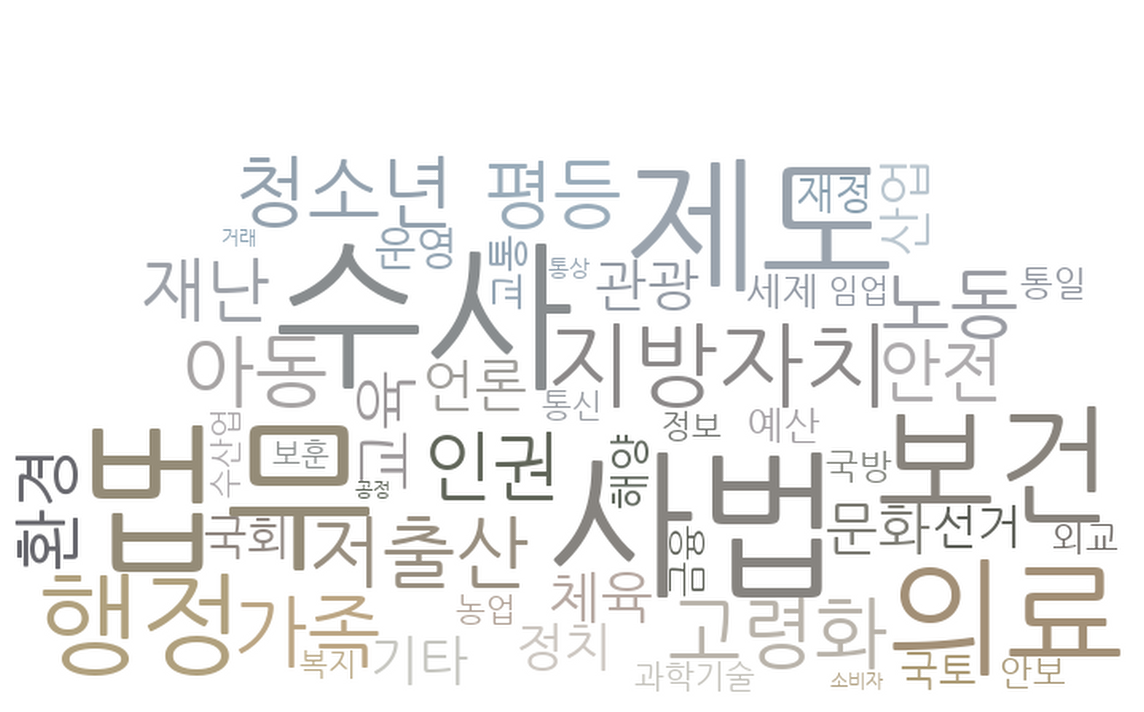

In [18]:
#워드클라우드로 나타내기
import nltk 
from konlpy.tag import Kkma
from konlpy.tag import Twitter

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS 
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

stopwords = set(STOPWORDS)    
img_mask = np.array(Image.open("청와대1.jpg")) 
image_colors = ImageColorGenerator(img_mask)
stopwords = set(STOPWORDS)    
FONTPATH =  "NanumGothic.ttf"

wordcloud = WordCloud(max_font_size = 100, max_words = 1000, background_color='white', stopwords=stopwords, random_state=10,mask=img_mask, color_func=image_colors, font_path = FONTPATH)
wc = wordcloud.generate_from_frequencies(text_cnt)

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = "lanczos")
plt.axis("off")
plt.show()

In [19]:
"""
문서로부터 주요 품사 고빈도 어휘 출력
"""
   
def split_sentences(content):    # 하나의 문서를 여러문장으로 나누기
    import re    
    all_sentences = []    
    lines = [line for line in content.strip().splitlines() if line.strip()]
    
    for line in lines:
        sentences = re.split("(?<=[.?!])\s+", line)
        all_sentences += sentences
    
    return all_sentences



def get_sentences(input_file_name):  #파일 불러오기
    
    sentences = []
    
    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for sentence in input_file:
            sub_sentences = split_sentences(sentence)  # 호출
            sentences += sub_sentences
    
    return sentences



def get_parts(sentences):   #코로란 형태소 분석기 실행
    
    from konlpy.tag import Komoran
    
    komoran = Komoran()
    results = []
    
    for sentence in sentences:
        parts = komoran.pos(sentence)
        for part in parts:
            results.append(part)
    
    return results


def filtered_parts(parts): # 주요품사만 추출
    
    N_POS = ["NNG", "NNP"]  # NNG : 일반명사, NNP : 고유명사
    V_POS = ["VV", "VA"]    # "VV" : 동사, "VA" : 형용사
    X_POS = ["XR"]          # "XR" : 어근
    M_POS = ["MAG", "MAJ"]   # "MAG": 일반부사, "MAJ" : 접속부사
    
    filtered = []
    
    for part in parts:
        if part[1] in V_POS:
          filtered.append(part[0]+"다") # 다가 필요한 경우      
    return filtered


def word_count(filtered):    #빈도 체크하고 정렬
    from collections import Counter    
    wordform_counter = Counter()

    for word in filtered:
        wordform_counter[word] += 1    
   # most_common() 순서대로 보여줌
    for word, count in wordform_counter.most_common(10):  # most_common(10) 10개 추출
        print("{}: {}".format(word, count))    
    
def main():
    input_file_name = "청원제목.txt"
    sentences = get_sentences(input_file_name)     
    parts = get_parts(sentences)     
    filtered = filtered_parts(parts)     
    word_count(filtered)     


main()

관하다: 226
위하다: 40
하다: 22
대하다: 17
있다: 11
되다: 2
없다: 2
인하다: 2
달다: 2
보아주다: 1


In [20]:
"""
문서로부터 주요 품사 고빈도 어휘 출력
"""
   
def split_sentences(content):    # 하나의 문서를 여러문장으로 나누기
    import re    
    all_sentences = []    
    lines = [line for line in content.strip().splitlines() if line.strip()]
    
    for line in lines:
        sentences = re.split("(?<=[.?!])\s+", line)
        all_sentences += sentences
    
    return all_sentences



def get_sentences(input_file_name):  #파일 불러오기
    
    sentences = []
    
    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for sentence in input_file:
            sub_sentences = split_sentences(sentence)  # 호출
            sentences += sub_sentences
    
    return sentences



def get_parts(sentences):   #코로란 형태소 분석기 실행
    
    from konlpy.tag import Komoran
    
    komoran = Komoran()
    results = []
    
    for sentence in sentences:
        parts = komoran.pos(sentence)
        for part in parts:
            results.append(part)
    
    return results


def filtered_parts(parts): # 주요품사만 추출
    
    N_POS = ["NNG", "NNP"]  # NNG : 일반명사, NNP : 고유명사
    V_POS = ["VV", "VA"]    # "VV" : 동사, "VA" : 형용사
    X_POS = ["XR"]          # "XR" : 어근
    M_POS = ["MAG", "MAJ"]   # "MAG": 일반부사, "MAJ" : 접속부사
    
    filtered = []
    
    for part in parts:
        if part[1] in M_POS:
          filtered.append(part[0])               
    return filtered


def word_count(filtered):    #빈도 체크하고 정렬
    from collections import Counter    
    wordform_counter = Counter()

    for word in filtered:
        wordform_counter[word] += 1    
   # most_common() 순서대로 보여줌
    for word, count in wordform_counter.most_common(10):  # most_common(10) 10개 추출
        print("{}: {}".format(word, count))    
    
def main():
    input_file_name = "청원제목.txt"
    sentences = get_sentences(input_file_name)     
    parts = get_parts(sentences)     
    filtered = filtered_parts(parts)     
    word_count(filtered)     


main()

및: 48
함께: 1
계속: 1


In [21]:
"""
문서로부터 주요 품사 고빈도 어휘 출력
"""
   
def split_sentences(content):    # 하나의 문서를 여러문장으로 나누기
    import re    
    all_sentences = []    
    lines = [line for line in content.strip().splitlines() if line.strip()]
    
    for line in lines:
        sentences = re.split("(?<=[.?!])\s+", line)
        all_sentences += sentences
    
    return all_sentences



def get_sentences(input_file_name):  #파일 불러오기
    
    sentences = []
    
    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for sentence in input_file:
            sub_sentences = split_sentences(sentence)  # 호출
            sentences += sub_sentences
    
    return sentences



def get_parts(sentences):   #코로란 형태소 분석기 실행
    
    from konlpy.tag import Komoran
    
    komoran = Komoran()
    results = []
    
    for sentence in sentences:
        parts = komoran.pos(sentence)
        for part in parts:
            results.append(part)
    
    return results


def filtered_parts(parts): # 주요품사만 추출
    
    N_POS = ["NNG", "NNP"]  # NNG : 일반명사, NNP : 고유명사
    V_POS = ["VV", "VA"]    # "VV" : 동사, "VA" : 형용사
    X_POS = ["XR"]          # "XR" : 어근
    M_POS = ["MAG", "MAJ"]   # "MAG": 일반부사, "MAJ" : 접속부사
    
    filtered = []
    
    for part in parts:
        if part[1] in N_POS:
            filtered.append(part[0])             
    return filtered


def word_count(filtered):    #빈도 체크하고 정렬
    from collections import Counter    
    wordform_counter = Counter()

    for word in filtered:
        wordform_counter[word] += 1    
   # most_common() 순서대로 보여줌
    for word, count in wordform_counter.most_common(10):  # most_common(10) 10개 추출
        print("{}: {}".format(word, count))    
    
def main():
    input_file_name = "청원제목.txt"
    sentences = get_sentences(input_file_name)     
    parts = get_parts(sentences)     
    filtered = filtered_parts(parts)     
    word_count(filtered)     


main()

청원: 213
개정: 77
반대: 30
제정: 28
법률: 23
요청: 21
법: 21
폐지: 19
관련: 13
개정안: 13


In [22]:
"""
문서로부터 주요 품사 고빈도 어휘 출력
"""
   
def split_sentences(content):    # 하나의 문서를 여러문장으로 나누기
    import re    
    all_sentences = []    
    lines = [line for line in content.strip().splitlines() if line.strip()]
    
    for line in lines:
        sentences = re.split("(?<=[.?!])\s+", line)
        all_sentences += sentences
    
    return all_sentences



def get_sentences(input_file_name):  #파일 불러오기
    
    sentences = []
    
    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for sentence in input_file:
            sub_sentences = split_sentences(sentence)  # 호출
            sentences += sub_sentences
    
    return sentences



def get_parts(sentences):   #코로란 형태소 분석기 실행
    
    from konlpy.tag import Komoran
    
    komoran = Komoran()
    results = []
    
    for sentence in sentences:
        parts = komoran.pos(sentence)
        for part in parts:
            results.append(part)
    
    return results


def filtered_parts(parts): # 주요품사만 추출
    
    N_POS = ["NNG", "NNP"]  # NNG : 일반명사, NNP : 고유명사
    V_POS = ["VV", "VA"]    # "VV" : 동사, "VA" : 형용사
    X_POS = ["XR"]          # "XR" : 어근
    M_POS = ["MAG", "MAJ"]   # "MAG": 일반부사, "MAJ" : 접속부사
    
    filtered = []
    
    for part in parts:
        if part[1] in N_POS:
            filtered.append(part[0])             
    return filtered


def word_count(filtered):    #빈도 체크하고 정렬
    from collections import Counter    
    wordform_counter = Counter()

    for word in filtered:
        wordform_counter[word] += 1    
   # most_common() 순서대로 보여줌
    for word, count in wordform_counter.most_common(10):  # most_common(10) 10개 추출
        print("{}: {}".format(word, count))    
    
def main():
    input_file_name = "청원분야.txt"
    sentences = get_sentences(input_file_name)     
    parts = get_parts(sentences)     
    filtered = filtered_parts(parts)     
    word_count(filtered)     


main()

수사: 35
법무: 35
사법: 35
제도: 35
보건: 27
의료: 27
행정: 20
지방: 20
자치: 20
저출산: 15


In [23]:
df = pd.read_excel('text.xlsx', sheet_name='Sheet1')
df.head()

,id,title,text
0,1,"윤석열 당선자가 주장한 지역별, 업종별 최저임금 차등적용의 근거가 되는 최저임금법 ...","윤 당선자는 지난해 8월 “최저임금 인상에 대해 지역별, 업종별 차등적용에 대한 전..."
1,2,여성가족부 폐지 찬성 및 동의에 관한 청원,<여성가족부가 해체되어야 하는 7가지 이유>\n(글자수 제한으로 인하여 상세이유를 ...
2,3,중대범죄수사청 입법 조치 및 발족 시한의 법제화에 관한 청원,2022년 4월 22일 현재 박병석 국회의장이 제안하고 여야가 수용한 검찰선진화 중...
3,4,여성가족부 폐지 반대에 관한 청원,"저는 성범죄 피해자이자, 해바라기 센터에서 도움 받던 사람으로서 청원글을 올립니다...."
4,5,전력 판매 시장 민간 개방 반대를 위한 전기사업법 개정에 관한 청원,현재 대통령직 인수위원회는 한국전력공사 전력판매 독점 폐지를 추진하겠다고 공약하였습...


In [24]:
text = df['text']

In [25]:
text.replace('\n\n','')

0     윤 당선자는 지난해 8월 “최저임금 인상에 대해 지역별, 업종별 차등적용에 대한 전...
1     <여성가족부가 해체되어야 하는 7가지 이유>\n(글자수 제한으로 인하여 상세이유를 ...
2     2022년 4월 22일 현재 박병석 국회의장이 제안하고 여야가 수용한 검찰선진화 중...
3     저는 성범죄 피해자이자, 해바라기 센터에서 도움 받던 사람으로서 청원글을 올립니다....
4     현재 대통령직 인수위원회는 한국전력공사 전력판매 독점 폐지를 추진하겠다고 공약하였습...
5     20대 대통령으로 윤석열 후보가 당선되었습니다.\n\n그러나 여전히 본인과 그부인에...
6     국가인권위원회법 개정안(이소영 의원 대표발의)을 아래와 같은 이유로 반대한다.\n\...
7     인권정책기본법(안)은 다음 문제점들이 있기에, 강력히 반대하며 철회를 요구한다.\n...
8     1.선거여론조사 결과는 언론에 공개할 수 없고 다만 각 정당과 선거대책본부의 선거전...
9     노점상이 탈세를 하면서 불법으로 영업한다는 논리는 전혀 맞지 않은 이야기입니다.\n...
10    1. 110만 돌봄노동자들의 법!\n돌봄노동자의 경력인정, 유급휴가, 퇴직급여, 방...
11    WEP(유엔세계식량계획)는 코로나19의 경제적 여파로 급성 식량 위기에 처한 인구가...
12    1. ‘당일 투표’만 시행한다는 내용을 개정법안에 명시해 주십시오.\n\n부정선거의...
13    간호인력부족 문제의 근본적인 원인은 간호사 1인당 환자수에 대해 법적 제한이 없고 ...
14    박주민의원이 대표 발의한, 평등에 관한 법률안(이하 평등법안)은 21개의 차별 사유...
15    한강1호 사건번호\n서울중앙지검 2021형제 ○○○○○호\n\n故손○○군 사망사건은...
16    현행 건강가정기본법 제3조 제1호는 “‘가족’이라 함은 혼인·혈연·입양으로 이루어진...
17    코로나 19 상황으로 학생들의 부분 등교가 길어지고 있으며 원격수업 장기화로

In [26]:
text.to_csv('text.txt', index = False)

In [27]:
z = pd.read_csv('text.txt')

In [28]:
"""
문서로부터 주요 품사 고빈도 어휘 출력
"""
   
def split_sentences(content):    # 하나의 문서를 여러문장으로 나누기
    import re    
    all_sentences = []    
    lines = [line for line in content.strip().splitlines() if line.strip()]
    
    for line in lines:
        sentences = re.split("(?<=[.?!])\s+", line)
        all_sentences += sentences
    
    return all_sentences



def get_sentences(input_file_name):  #파일 불러오기
    
    sentences = []
    
    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for sentence in input_file:
            sub_sentences = split_sentences(sentence)  # 호출
            sentences += sub_sentences
    
    return sentences



def get_parts(sentences):   #코로란 형태소 분석기 실행
    
    from konlpy.tag import Komoran
    
    komoran = Komoran()
    results = []
    
    for sentence in sentences:
        parts = komoran.pos(sentence)
        for part in parts:
            results.append(part)
    
    return results


def filtered_parts(parts): # 주요품사만 추출
    
    N_POS = ["NNG", "NNP"]  # NNG : 일반명사, NNP : 고유명사
    V_POS = ["VV", "VA"]    # "VV" : 동사, "VA" : 형용사
    X_POS = ["XR"]          # "XR" : 어근
    M_POS = ["MAG", "MAJ"]   # "MAG": 일반부사, "MAJ" : 접속부사
    
    filtered = []
    
    for part in parts:
        if part[1] in V_POS:
          filtered.append(part[0]+"다") # 다가 필요한 경우      
    return filtered


def word_count(filtered):    #빈도 체크하고 정렬
    from collections import Counter    
    wordform_counter = Counter()

    for word in filtered:
        wordform_counter[word] += 1    
   # most_common() 순서대로 보여줌
    for word, count in wordform_counter.most_common(10):  # most_common(10) 10개 추출
        print("{}: {}".format(word, count))    
    
def main():
    input_file_name = "text.txt"
    sentences = get_sentences(input_file_name)     
    parts = get_parts(sentences)     
    filtered = filtered_parts(parts)     
    word_count(filtered)     


main()

있다: 118
하다: 107
되다: 74
대하다: 66
위하다: 56
없다: 48
받다: 34
정하다: 20
보다: 18
만들다: 17


In [29]:
"""
문서로부터 주요 품사 고빈도 어휘 출력
"""
   
def split_sentences(content):    # 하나의 문서를 여러문장으로 나누기
    import re    
    all_sentences = []    
    lines = [line for line in content.strip().splitlines() if line.strip()]
    
    for line in lines:
        sentences = re.split("(?<=[.?!])\s+", line)
        all_sentences += sentences
    
    return all_sentences



def get_sentences(input_file_name):  #파일 불러오기
    
    sentences = []
    
    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for sentence in input_file:
            sub_sentences = split_sentences(sentence)  # 호출
            sentences += sub_sentences
    
    return sentences



def get_parts(sentences):   #코로란 형태소 분석기 실행
    
    from konlpy.tag import Komoran
    
    komoran = Komoran()
    results = []
    
    for sentence in sentences:
        parts = komoran.pos(sentence)
        for part in parts:
            results.append(part)
    
    return results


def filtered_parts(parts): # 주요품사만 추출
    
    N_POS = ["NNG", "NNP"]  # NNG : 일반명사, NNP : 고유명사
    V_POS = ["VV", "VA"]    # "VV" : 동사, "VA" : 형용사
    X_POS = ["XR"]          # "XR" : 어근
    M_POS = ["MAG", "MAJ"]   # "MAG": 일반부사, "MAJ" : 접속부사
    
    filtered = []
    
    for part in parts:
        if part[1] in M_POS:
          filtered.append(part[0])               
    return filtered


def word_count(filtered):    #빈도 체크하고 정렬
    from collections import Counter    
    wordform_counter = Counter()

    for word in filtered:
        wordform_counter[word] += 1    
   # most_common() 순서대로 보여줌
    for word, count in wordform_counter.most_common(10):  # most_common(10) 10개 추출
        print("{}: {}".format(word, count))    
    
def main():
    input_file_name = "text.txt"
    sentences = get_sentences(input_file_name)     
    parts = get_parts(sentences)     
    filtered = filtered_parts(parts)     
    word_count(filtered)     


main()

및: 31
또한: 23
이미: 10
같이: 10
그런데: 9
그러나: 9
더: 9
또는: 9
그리고: 8
즉: 8


In [30]:
"""
문서로부터 주요 품사 고빈도 어휘 출력
"""
   
def split_sentences(content):    # 하나의 문서를 여러문장으로 나누기
    import re    
    all_sentences = []    
    lines = [line for line in content.strip().splitlines() if line.strip()]
    
    for line in lines:
        sentences = re.split("(?<=[.?!])\s+", line)
        all_sentences += sentences
    
    return all_sentences



def get_sentences(input_file_name):  #파일 불러오기
    
    sentences = []
    
    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for sentence in input_file:
            sub_sentences = split_sentences(sentence)  # 호출
            sentences += sub_sentences
    
    return sentences



def get_parts(sentences):   #코로란 형태소 분석기 실행
    
    from konlpy.tag import Komoran
    
    komoran = Komoran()
    results = []
    
    for sentence in sentences:
        parts = komoran.pos(sentence)
        for part in parts:
            results.append(part)
    
    return results


def filtered_parts(parts): # 주요품사만 추출
    
    N_POS = ["NNG", "NNP"]  # NNG : 일반명사, NNP : 고유명사
    V_POS = ["VV", "VA"]    # "VV" : 동사, "VA" : 형용사
    X_POS = ["XR"]          # "XR" : 어근
    M_POS = ["MAG", "MAJ"]   # "MAG": 일반부사, "MAJ" : 접속부사
    
    filtered = []
    
    for part in parts:
        if part[1] in N_POS:
            filtered.append(part[0])             
    return filtered


def word_count(filtered):    #빈도 체크하고 정렬
    from collections import Counter    
    wordform_counter = Counter()

    for word in filtered:
        wordform_counter[word] += 1    
   # most_common() 순서대로 보여줌
    for word, count in wordform_counter.most_common(10):  # most_common(10) 10개 추출
        print("{}: {}".format(word, count))    
    
def main():
    input_file_name = "text.txt"
    sentences = get_sentences(input_file_name)     
    parts = get_parts(sentences)     
    filtered = filtered_parts(parts)     
    word_count(filtered)     


main()

법: 80
국가: 77
국민: 59
여성: 57
가족: 52
투표: 45
조사: 38
개정: 38
노동자: 37
인권: 36


여기까지는 완벽 잘됌.


In [31]:
with open('text.txt', 'r', encoding='utf-8') as f:
    text = f.read()
okt = Okt()
nouns = okt.nouns(text) 
words = [n for n in nouns if len(n) > 1]

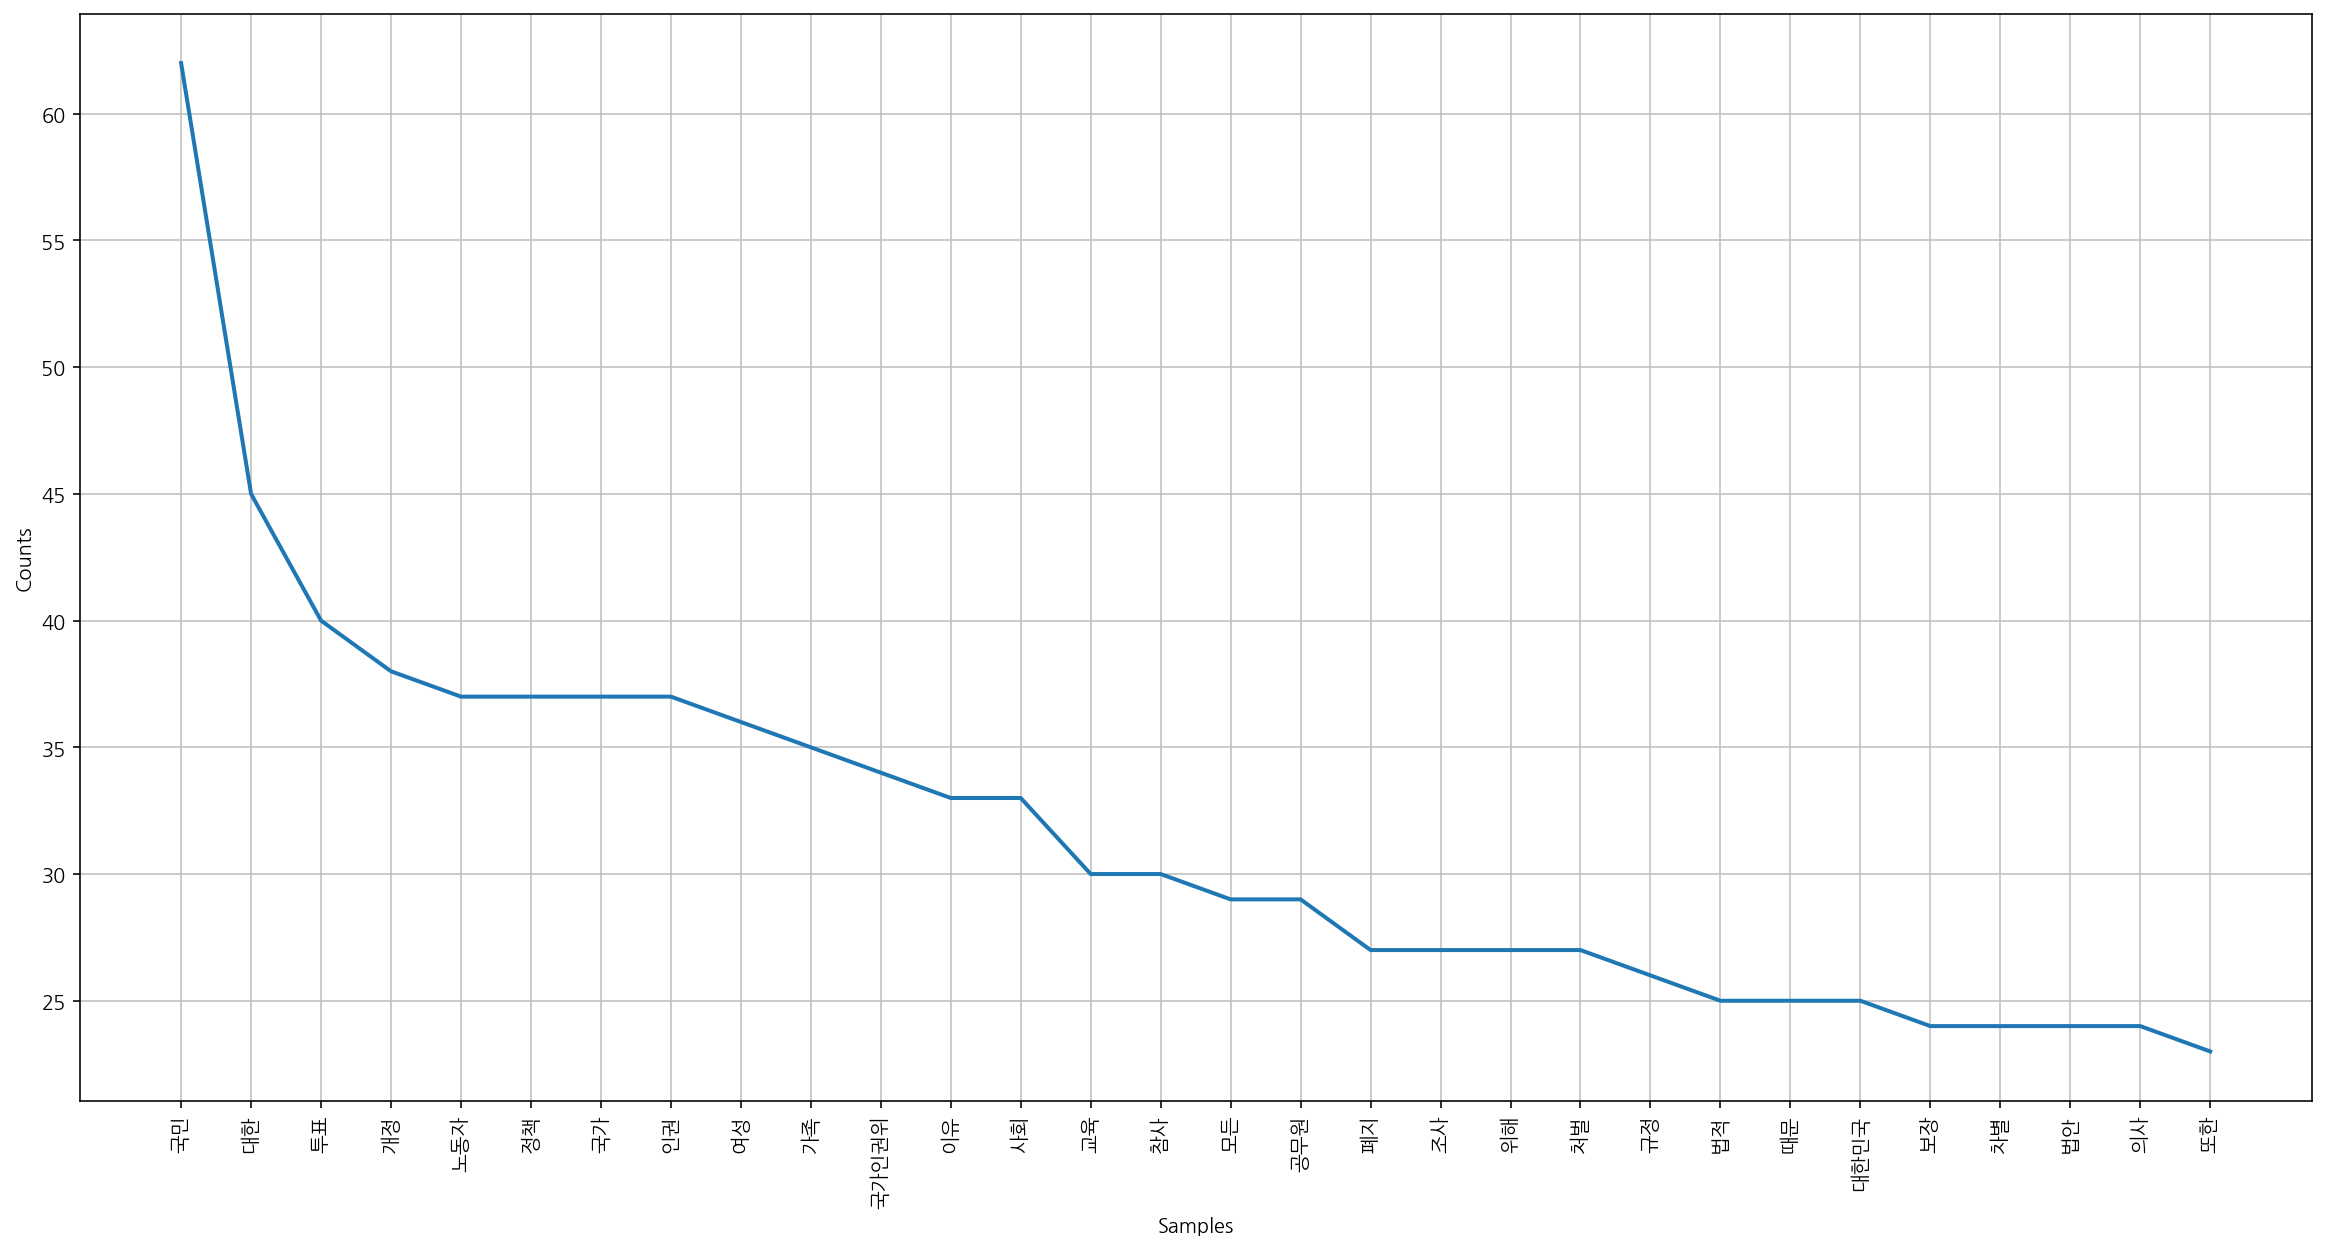

In [32]:
import matplotlib.pyplot as plt
import nltk
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
from matplotlib import font_manager

%config InlineBackend.figure_format = 'retina'
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumGothic') 
#mpl.font_manager._rebuild()

plt.figure(figsize=(20,10))
words = nltk.Text(words, name='단어 빈도수')
words.plot(30)
plt.show()

In [33]:
# 단어 빈도표를 보고 일부 단어 불용어 처리
stopword = ['.']
text = [i for i in words if i not in stopword]
text_cnt = Counter(text)

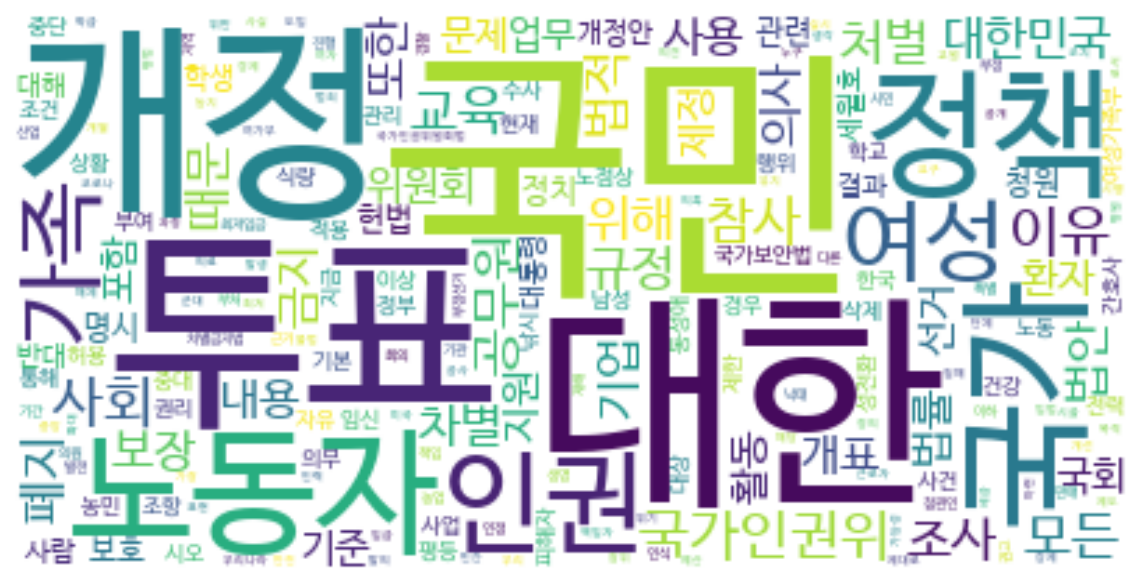

In [34]:
# colormap 글씨색 설정 가능, img_mask, mask 모양 설정
# img_mask = np.array(Image.open("heart.png"))

wordcloud = WordCloud(font_path = fontpath, 
                      background_color='white',
                      # colormap = "Accent_r", 
                      # mask = img_mask, 
                      random_state = 20, 
                      max_words = 200).generate_from_frequencies(text_cnt)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")        
plt.axis("off")

plt.savefig("title.png")
plt.show()

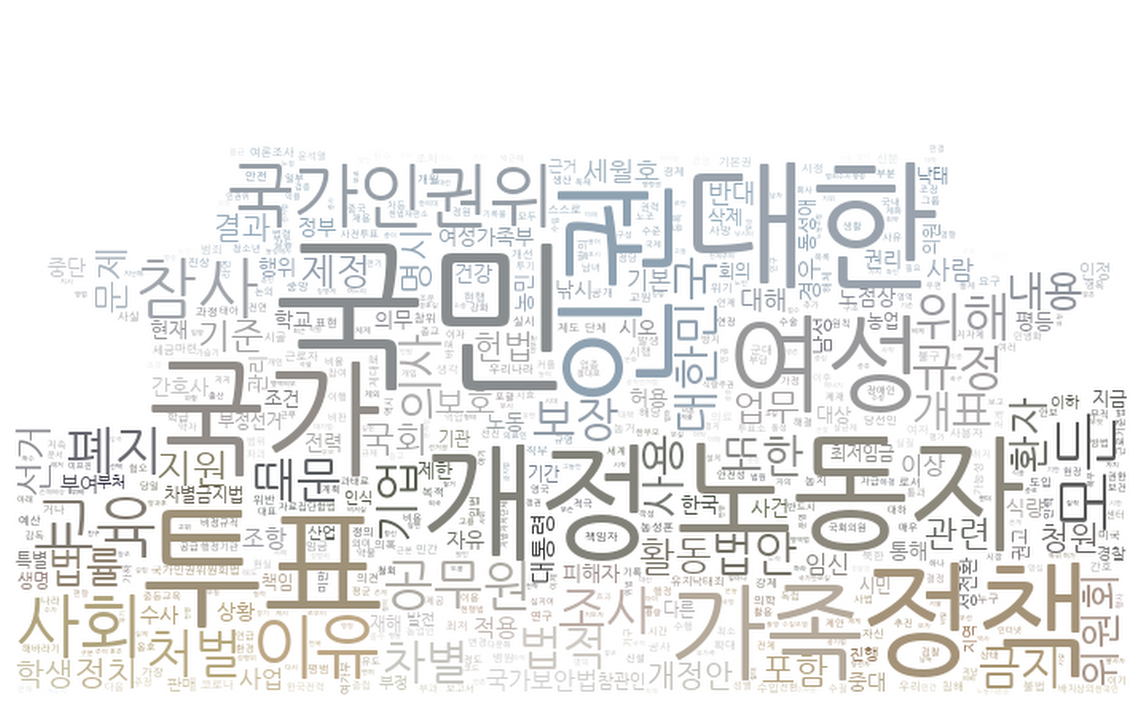

In [35]:
#워드클라우드로 나타내기
import nltk 
from konlpy.tag import Kkma
from konlpy.tag import Twitter

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS 
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

stopwords = set(STOPWORDS)    
img_mask = np.array(Image.open("청와대1.jpg")) 
image_colors = ImageColorGenerator(img_mask)
stopwords = set(STOPWORDS)    
FONTPATH =  "NanumGothic.ttf"

wordcloud = WordCloud(max_font_size = 100, max_words = 1000, background_color='white', stopwords=stopwords, random_state=10,mask=img_mask, color_func=image_colors, font_path = FONTPATH)
wc = wordcloud.generate_from_frequencies(text_cnt)

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = "lanczos")
plt.axis("off")
plt.show()